# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Parse data, define m and n values

points = np.genfromtxt('ex2data1.txt', delimiter = ',')
m, n = points.shape

x = np.array(points[:, :-1])
y = np.array(points[:, -1:])

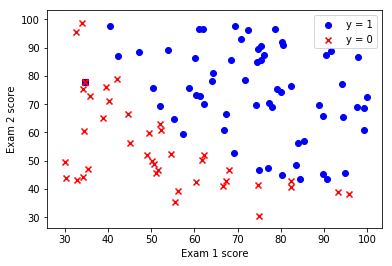

In [3]:
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(x[pos, 0], x[pos, 1], marker='o', c='b')
plt.scatter(x[neg, 0], x[neg, 1], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['y = 1', 'y = 0'])

plt.show()

In [4]:
def featureNormalize(X):
    mu = np.mean(X)
    sigma = np.std(X)
    X_norm = (X - mu)/sigma
    return X_norm , mu , sigma

x, mean, std = featureNormalize(x)

In [5]:
# Add a column of ones to x, we will call this X
ones = np.ones((m,1))
X = np.hstack((ones, x))

theta = np.zeros((n, 1))

In [6]:
#Hyperparameters
iterations = 1000
alpha = 0.05

In [7]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


In [8]:
def gradient(x, y, theta):
    m = x.shape[0]
    h = sigmoid(x.dot(theta))
    grad = ((x.T).dot(h-y))/m
    return grad

In [9]:
def cost(x, y, theta):
    m = x.shape[0]
    h = sigmoid(x.dot(theta))
    
    J = ((np.dot(-y.T, np.log(h)) - np.dot((1-y).T, np.log(1-h))) /m).flatten()
    # Calling the gradient within the cost function makes it easier for gradient descent to run
    grad = gradient(x, y, theta)
    
    return J, grad

In [10]:
init_J, init_grad = cost(X, y, theta)
print("Init cost", init_J)
print("Init gradient")
print(init_grad)

Init cost [0.69314718]
Init gradient
[[-0.1       ]
 [-0.28606568]
 [-0.24664251]]


In [11]:
def gradient_descent(X,y, theta, alpha, iterations):
    J_hist = []
    for i in range(iterations):
        J, grad = cost(X, y, theta)
        theta = theta - (alpha * grad)
        J_hist.append(J)
    return theta, J_hist

theta, J_hist = gradient_descent(X,y, theta,alpha, iterations)

In [12]:
def predict(x, theta):
    m, _ = x.shape
    p = np.zeros((m,1))
    h = sigmoid(np.dot(x,theta))
    for i in range(0, h.shape[0]):
        if h[i] >= 0.5:
            p[i, 0] = 1
        else:
            p[i, 0] = 0
    return p

pred = predict(X, theta)
print ('Train Accuracy: %f' % ((y[np.where(pred == y)].size / y.size) * 100))

Train Accuracy: 89.000000


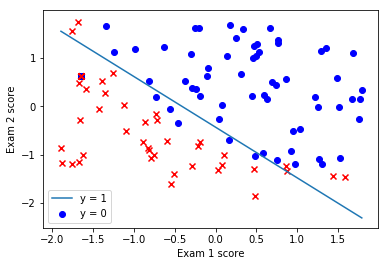

In [13]:
# Rescale the variables for plotting
# x = x * std + mean

pos = np.where(y == 1)
neg = np.where(y == 0)

plt.scatter(x[pos, 0], x[pos, 1], marker='o', c='b')
plt.scatter(x[neg, 0], x[neg, 1], marker='x', c='r')

# Get the max and min x value
x_plt = np.array((np.min(x[:,0]),np.max(x[:,0])))

y_plt = (theta[0] + theta[1]*x_plt)/(-theta[2])

plt.plot(x_plt, y_plt)

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['y = 1', 'y = 0'])

plt.show()

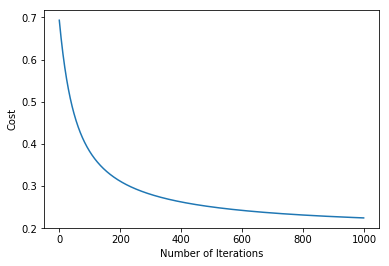

In [14]:
# Plotting Cost over the Number of Iterations
cost_x = np.arange(iterations)
cost_y = J_hist

#Plot both the data points as well as the line of best fit
plt.plot(cost_x, cost_y)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show() 

In [17]:
print("Theta final: ")
print(theta)

Theta final: 
[[1.00578498]
 [2.44137845]
 [2.32770309]]


In [18]:
print("Final cost", J_hist[-1])

Final cost [0.22445662]
